In [4]:
## for questions contact Johannes Schwenzer @ johannes.m.schwenzer@gmail.com

import pypsa
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import matplotlib.font_manager
import seaborn as sns
import os
import warnings
warnings.filterwarnings("ignore")
import logging
logging.getLogger("pypsa").setLevel(level=logging.CRITICAL) 

In [5]:
### read in data  !change the path so that it matches your file destination! 

In [26]:
models=['ICHEC','CNRM','MPI']
dfmodeldict={}
for model in models:
    # cap share
    df= pd.read_csv(f"/home/users/train037/group_5/data/cap_share_all_periods_model_{model}.csv")
    df=df.T
    df.columns = ['OCGT_share','offwind_share','onwind_share','ror_share','solar_share']
    df=df.iloc[1:]    
    df=df.astype('float')

    # cap factor
    df2=pd.read_csv(f"/home/users/train037/group_5/data/cap_factor_input_per_carrier_all_periods_{model}.csv")
    df2=df2.T
    df2.columns = ['offwind_capfactor','onwindcapfactor','ror_capfactor','solar_capfactor']
    df2=df2.iloc[1:]    
    df2=df2.astype('float')

    #gen share
    df3=pd.read_csv(f"/home/users/train037/group_5/data/gen_share_all_periods_model_{model}.csv")
    df3=df3.T
    df3.columns = ['OCGT_gen','offwind_gen','onwind_gen','ror_gen','solar_gen']
    df3=df3.iloc[1:]    
    df3=df3.astype('float')

    # lcoe per carrier
    df4=pd.read_csv(f"/home/users/train037/group_5/data/lceo_per_carrier_all_periods_model_{model}.csv")
    df4=df4.T
    df4.columns = ['OCGT_lcoe','offwind_lcoe','onwind_lcoe','ror_lcoe','solar_lcoe']
    df4=df4.iloc[1:]    
    df4=df4.astype('float')

    # lcoe total
    df5=pd.read_csv(f"/home/users/train037/group_5/data/lcoe_all_periods_model_{model}.csv")
    df5=df5.T
    df5.columns = ['lcoe_total']
    df5=df5.iloc[1:]    
    df5=df5.astype('float')

    # Energy storage capacity
    df6=pd.read_csv(f"/home/users/train037/group_5/data/storage_capacity_per_carrier_all_periods_model{model}.csv")
    df6=df6.T
    df6.columns = ['H2_Storage','PHS','battery','hydro']
    df6=df6.iloc[1:]    
    df6=df6.drop(labels='PHS', axis=1)
    df6=df6.drop(labels='hydro', axis=1)
    df6=df6.astype('float')
    
    # join dataframe
    matrixdf=df.join(df2)
    matrixdf=matrixdf.join(df3)
    matrixdf=matrixdf.join(df4)
    matrixdf=matrixdf.join(df5)
    matrixdf=matrixdf.join(df6)

    # drop NaNs
    matrixdf=matrixdf.drop(labels='1994-2000', axis=0)

    # drop ror_share because it doesn't change and ror_lcoe because it's 0
    matrixdf=matrixdf.drop(labels='ror_share', axis=1)
    matrixdf=matrixdf.drop(labels='ror_lcoe', axis=1)
    
    dfmodeldict[model]=matrixdf.copy()



In [27]:
# unpack dataframes for each model

matrixdf_ICHEC=dfmodeldict['ICHEC']
matrixdf_CNRM=dfmodeldict['CNRM']
matrixdf_MPI=dfmodeldict['MPI']

In [ ]:
## create and plot correlation matrix

<AxesSubplot:>

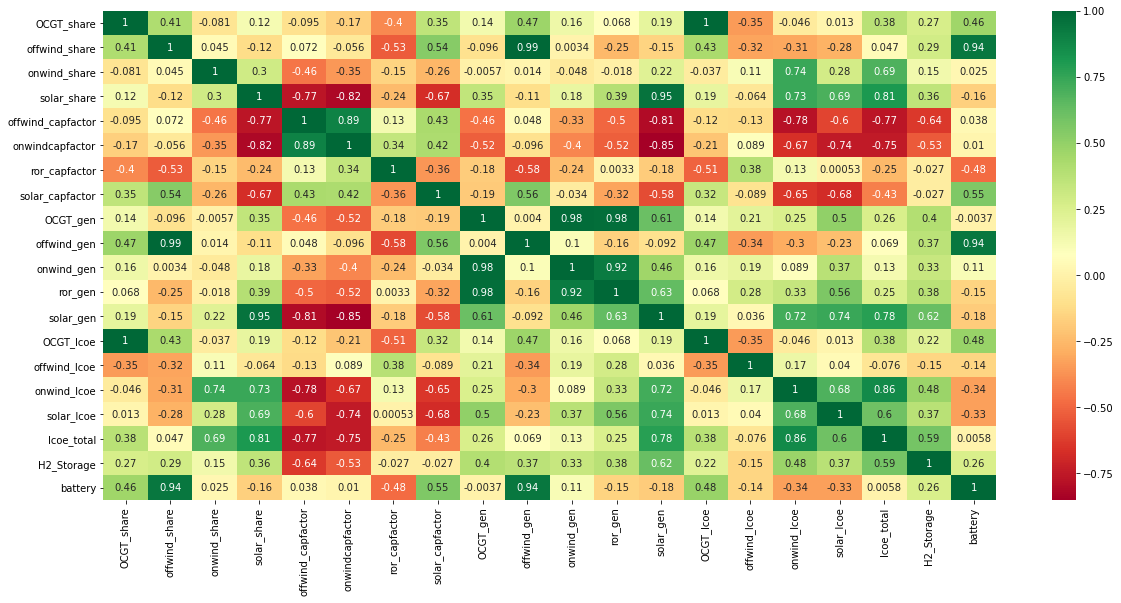

In [28]:
#ICHEC Model

corr_df = matrixdf_ICHEC.corr(method='pearson')
plt.figure(figsize=(20, 9))
sns.heatmap(corr_df, annot=True, cmap="RdYlGn")

In [ ]:
## simple plots to check if the output is making sense
# for example since we see a correlation of 1 between OCGT_share and OCGT_lcoe, a plot has to show a straight upwards line.
# If it doesn't the correlation is calculated wrong.

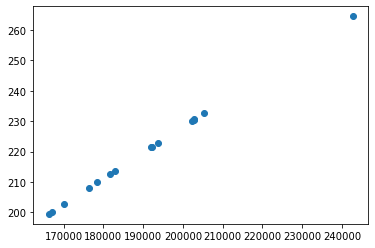

In [29]:
fig, ax = plt.subplots()
ax.scatter(matrixdf_ICHEC.OCGT_share, matrixdf_ICHEC.OCGT_lcoe)

In [ ]:
# --> Hurray! linear correlation of 1 is correct!

In [ ]:
## focus on certain correlations and look at each model

<AxesSubplot:title={'center':'ICHEC'}>

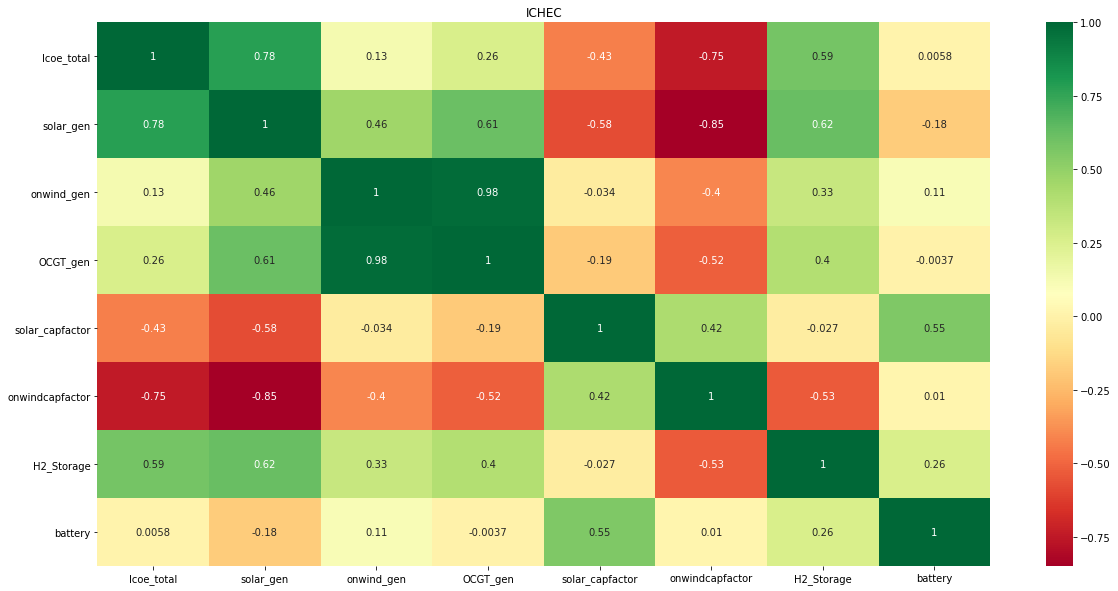

In [31]:
# ICHEC
focusdf=pd.DataFrame(index=[])
focusdf['lcoe_total']=matrixdf_ICHEC['lcoe_total']
focusdf['solar_gen']=matrixdf_ICHEC['solar_gen']
focusdf['onwind_gen']=matrixdf_ICHEC['onwind_gen']
focusdf['OCGT_gen']=matrixdf_ICHEC['OCGT_gen']
focusdf['solar_capfactor']=matrixdf_ICHEC['solar_capfactor']
focusdf['onwindcapfactor']=matrixdf_ICHEC['onwindcapfactor']
focusdf['H2_Storage']=matrixdf_ICHEC['H2_Storage']
focusdf['battery']=matrixdf_ICHEC['battery']

corr_focus_ICHEC = focusdf.corr(method='pearson')
plt.figure(figsize=(20, 10))
plt.title('ICHEC')
sns.heatmap(corr_focus_ICHEC, annot=True, cmap="RdYlGn")


<AxesSubplot:title={'center':'CNRM'}>

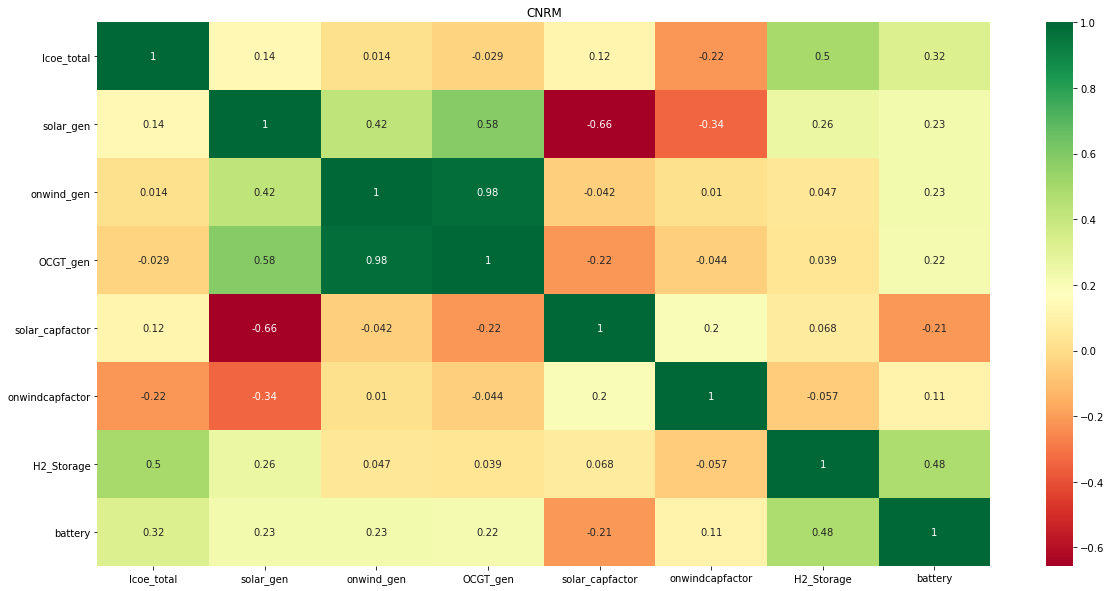

In [32]:
# CNRM
focusdf=pd.DataFrame(index=[])
focusdf['lcoe_total']=matrixdf_CNRM['lcoe_total']
focusdf['solar_gen']=matrixdf_CNRM['solar_gen']
focusdf['onwind_gen']=matrixdf_CNRM['onwind_gen']
focusdf['OCGT_gen']=matrixdf_CNRM['OCGT_gen']
focusdf['solar_capfactor']=matrixdf_CNRM['solar_capfactor']
focusdf['onwindcapfactor']=matrixdf_CNRM['onwindcapfactor']
focusdf['H2_Storage']=matrixdf_CNRM['H2_Storage']
focusdf['battery']=matrixdf_CNRM['battery']

corr_focus_CNRM = focusdf.corr(method='pearson')
plt.figure(figsize=(20, 10))
plt.title('CNRM')
sns.heatmap(corr_focus_CNRM, annot=True, cmap="RdYlGn")


<AxesSubplot:title={'center':'MPI'}>

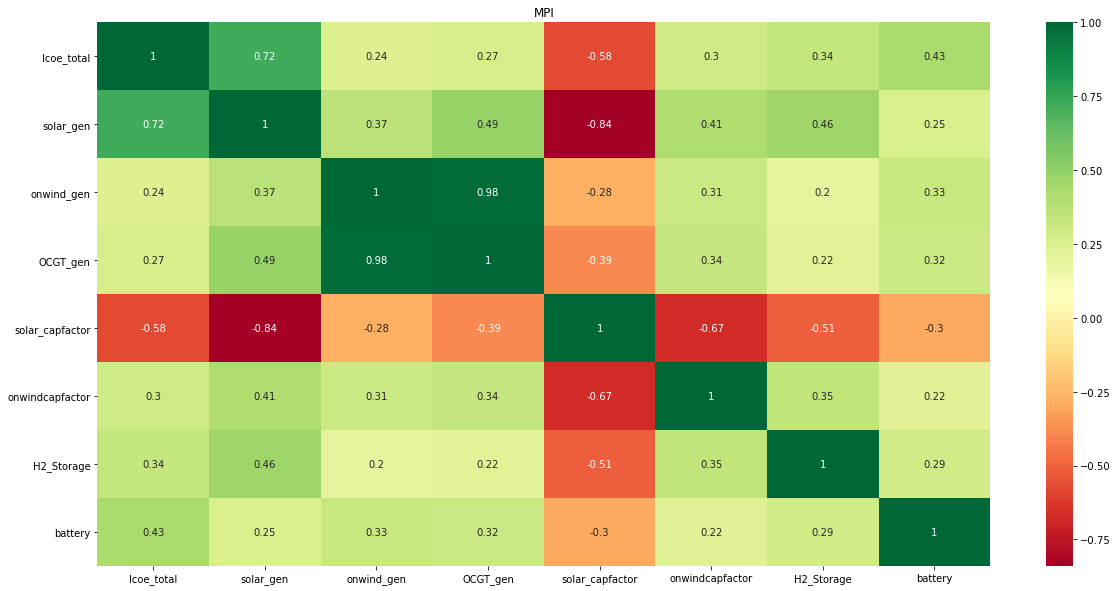

In [33]:
# MPI
focusdf=pd.DataFrame(index=[])
focusdf['lcoe_total']=matrixdf_MPI['lcoe_total']
focusdf['solar_gen']=matrixdf_MPI['solar_gen']
focusdf['onwind_gen']=matrixdf_MPI['onwind_gen']
focusdf['OCGT_gen']=matrixdf_MPI['OCGT_gen']
focusdf['solar_capfactor']=matrixdf_MPI['solar_capfactor']
focusdf['onwindcapfactor']=matrixdf_MPI['onwindcapfactor']
focusdf['H2_Storage']=matrixdf_MPI['H2_Storage']
focusdf['battery']=matrixdf_MPI['battery']

focusdf=focusdf.drop(labels='2030-2038',axis=0)

corr_focus_MPI = focusdf.corr(method='pearson')
plt.figure(figsize=(20, 10))
plt.title('MPI')
sns.heatmap(corr_focus_MPI, annot=True, cmap="RdYlGn")

In [ ]:
## plot all matrices next to each other

<AxesSubplot:title={'center':'CNRM'}>

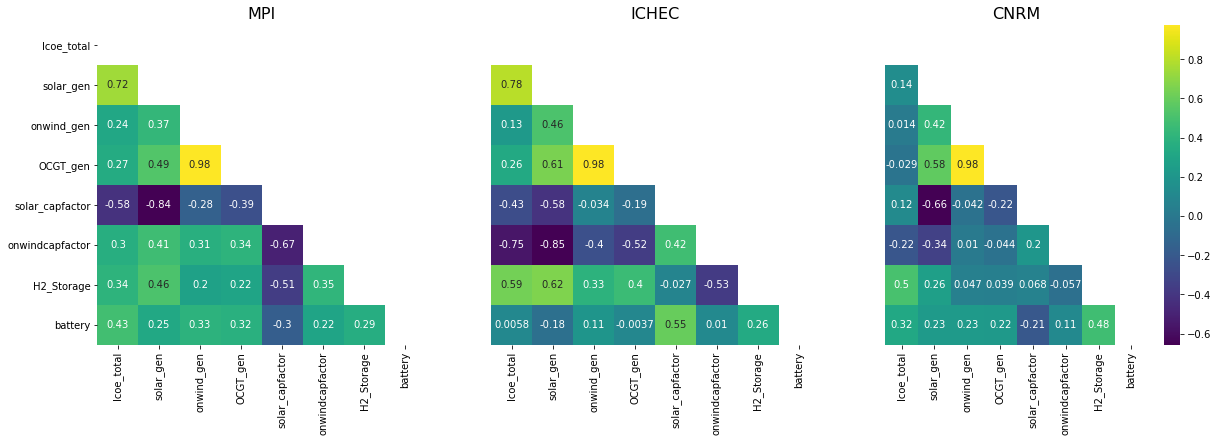

In [34]:
fig = plt.figure(figsize = (20,20)) 
ax1 = fig.add_subplot(3, 3, 1) # row, column, position
ax1.set_title('MPI', fontsize=16)
ax2 = fig.add_subplot(3, 3, 2)
ax2.set_title('ICHEC', fontsize=16)
ax3 = fig.add_subplot(3, 3, 3)
ax3.set_title('CNRM', fontsize=16)

# only plot half 
mask = np.zeros_like(corr_focus_MPI)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(data=corr_focus_MPI, ax=ax1,mask=mask , annot=True,cmap="viridis", cbar=False)
sns.heatmap(data=corr_focus_ICHEC, ax=ax2,mask=mask, annot=True,cmap="viridis",yticklabels=False, cbar=False)
sns.heatmap(data=corr_focus_CNRM, ax=ax3,mask=mask, annot=True,cmap="viridis",yticklabels=False)


In [ ]:
### combine data of all models to see if there is a general correlation

<AxesSubplot:title={'center':'All models'}>

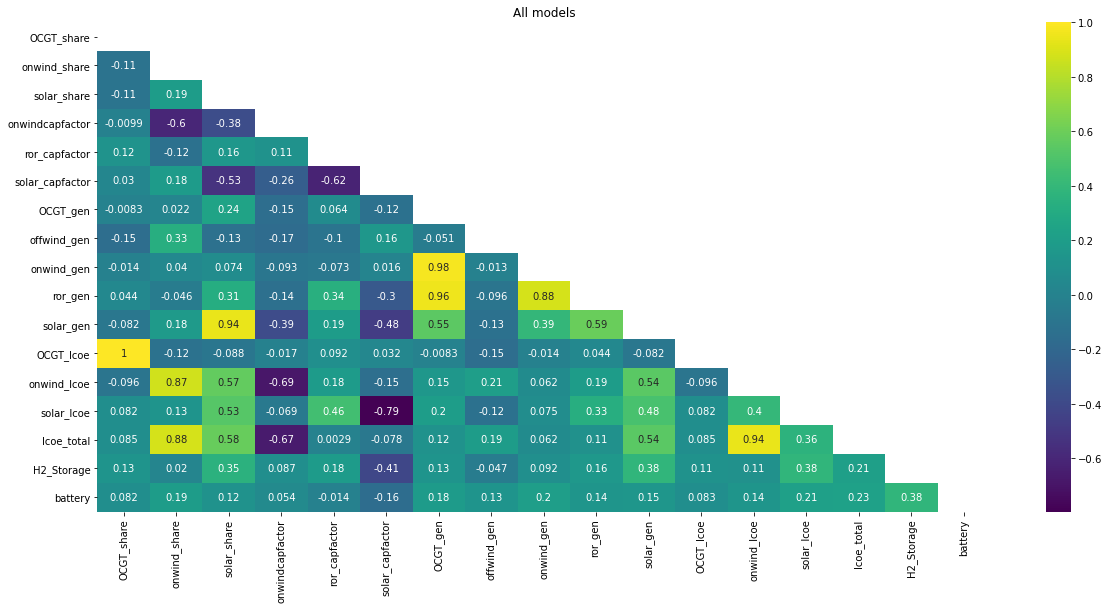

In [37]:
df_all_models = pd.concat([matrixdf_ICHEC, matrixdf_CNRM, matrixdf_MPI], ignore_index=True)
# drop offwind as it is not relevant in this energy model
df_all_models= df_all_models.drop(labels='offwind_capfactor', axis=1)
df_all_models= df_all_models.drop(labels='offwind_share', axis=1)
df_all_models= df_all_models.drop(labels='offwind_lcoe', axis=1)


corr_all_models = df_all_models.corr(method='pearson')

mask = np.zeros_like(corr_all_models)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(20, 9))
plt.title('All models')
sns.heatmap(corr_all_models, mask=mask,annot=True, cmap="viridis")

In [ ]:
## look at differences between the energy model outputs respective to climate datasets

In [106]:
testframe = pd.DataFrame(index=[])
testframe['onwind_gen_ICHEC']=matrixdf_ICHEC['onwind_gen']
testframe['onwind_gen_MPI']=matrixdf_MPI['onwind_gen']
testframe['lcoe_ICHEC']=matrixdf_ICHEC['lcoe_total']
testframe['lcoe_MPI']=matrixdf_MPI['lcoe_total']
testframe['lcoe_CNRM']=matrixdf_CNRM['lcoe_total']

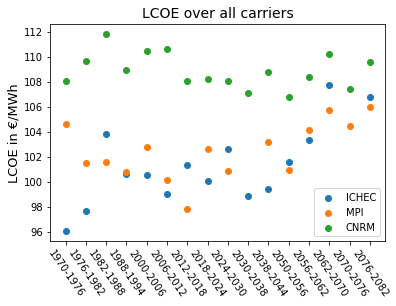

In [107]:
fig, ax = plt.subplots()
plt.xticks(rotation=-55)
ax.set_title('LCOE over all carriers', fontsize=14)
ax.set_ylabel('LCOE in €/MWh', fontsize=13)
ax.scatter(testframe.index, testframe.lcoe_ICHEC, label='ICHEC')
ax.scatter(testframe.index, testframe.lcoe_MPI, label='MPI')
ax.scatter(testframe.index, testframe.lcoe_CNRM, label='CNRM')

ax.legend()

In [25]:
###  
df6=pd.read_csv(f"/home/users/train037/group_5/data/storage_capacity_per_carrier_all_periods_modelCNRM.csv")
df6=df6.T
df6.columns = ['H2_Storage','PHS','battery','hydro']
df6=df6.iloc[1:]    
df6=df6.drop(labels='PHS', axis=1)
df6=df6.drop(labels='hydro', axis=1)
df6=df6.astype('float')


df6.head()



,H2_Storage,battery
1970-1976,12191.168535,0.271319
1976-1982,15869.388004,0.152895
1982-1988,18473.898737,1.681077
1988-1994,18101.348608,0.418292
1994-2000,16843.506683,0.915384


In [13]:
df4.iloc[:,3]

Unnamed: 0            hydro
1970-1976     122755.924905
1976-1982     122755.924905
1982-1988     122755.924905
1988-1994     122755.924905
1994-2000     122755.924905
2000-2006     122755.924905
2006-2012     122755.924905
2012-2018     122755.924905
2018-2024     122755.924905
2024-2030     122755.924905
2030-2038     122755.924905
2038-2044     122755.924905
2044-2050     122755.924905
2050-2056     122755.924905
2056-2062     122755.924905
2062-2070     122755.924905
2070-2076     122755.924905
2076-2082     122755.924905
2082-2088     122755.924905
2088-2094     122755.924905
2094-2101     122755.924905
Name: 3, dtype: object